# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [3]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [4]:
# Your work here.
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [5]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


Based on the histogram below, it appears the distribution is almost normal, but is a little skewed to the left, with some outliers around 100 Degrees Farenheit.  Therefore, this distribution is not quite normal.

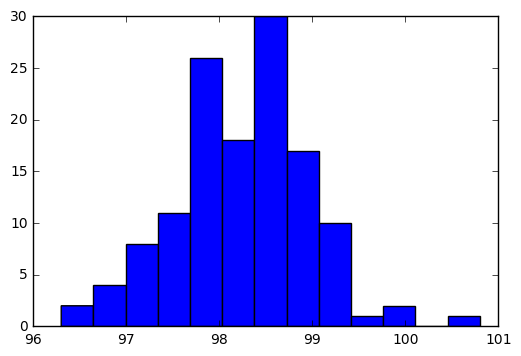

In [9]:
fig, ax = plt.subplots()
temps = ax.hist(df.temperature, bins = 'auto')

In [10]:
df.temperature.mean()

98.24923076923078

In [13]:
df.temperature.median()

98.3

In [14]:
df.temperature.max() #farther from the mean than the minimum value is

100.8

In [15]:
df.temperature.min()

96.299999999999997

In [12]:
df.temperature.std() #standard deviation

0.7331831580389454

The sample size is greater than 30, so it is large enough for our hypothesis testing.  Now, to test whether the observations are independent or not, we will have to test to see that the distribution of temperatures remains the same, regardless of gender or heart rate.

In [18]:
males = df[df.gender == 'M']
males = males.reset_index(drop=True)
males

,temperature,gender,heart_rate
0,97.8,M,73.0
1,99.2,M,83.0
2,98.0,M,71.0
3,98.8,M,78.0
4,98.2,M,72.0
5,98.2,M,64.0
6,99.4,M,70.0
7,98.2,M,71.0
8,98.6,M,70.0
9,98.4,M,68.0


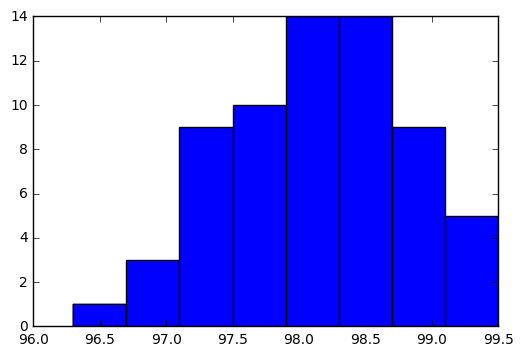

In [19]:
fig, ax = plt.subplots()
males_hist = ax.hist(males.temperature, bins = 'auto')

In [20]:
males.temperature.mean()

98.1046153846154

In [21]:
males.temperature.std()

0.6987557623265908

In [22]:
females = df[df.gender == 'F']
females = females.reset_index(drop=True)
females

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,99.2,F,66.0
3,98.0,F,73.0
4,98.4,F,84.0
5,98.6,F,86.0
6,98.8,F,89.0
7,96.7,F,62.0
8,98.7,F,79.0
9,97.8,F,77.0


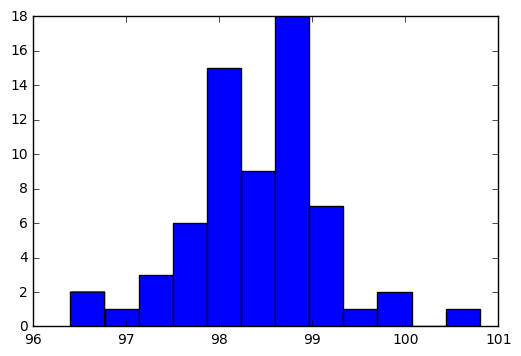

In [23]:
fig, ax = plt.subplots()
females_hist = ax.hist(females.temperature, bins = 'auto')

In [24]:
females.temperature.mean()

98.39384615384613

In [27]:
females.temperature.std()

0.7434877527313665

So, with the mean temperatures for males and females, we can perform a Chi-Square Test to determine if gender and body temperature are independent.  We will operate under the null hypothesis that gender and body temperature are independent, and use a 5% significance level.

In [29]:
x = (((males.temperature.mean()-df.temperature.mean())**2)/df.temperature.mean()) + (((females.temperature.mean()-df.temperature.mean())**2)/df.temperature.mean())
x

0.000425725663268992

With one degree of freedom, our X is clearly within our significance level. Therefore, based on the mean female and male body temperatures, and our Chi-Square test, we fail to reject the null hypothesis. Therefore, we accept that gender and body temperature are independent.

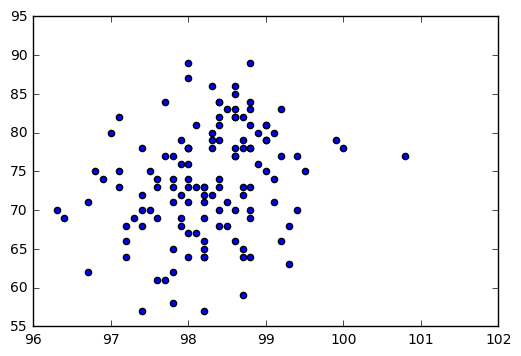

In [31]:
fig, ax = plt.subplots()
scat = ax.scatter(df.temperature, df.heart_rate)

In [32]:
from scipy.stats import linregress
linregress(df.temperature, df.heart_rate)

LinregressResult(slope=2.4432380386118826, intercept=-166.28471941820311, rvalue=0.25365640272076412, pvalue=0.0035914892507082374, stderr=0.82351902091442197)

Based on the scatter plot and linear regression between temperature and heart rate, it appears that there is no apparent correlation between heart rate and body temperature.  Therefore, we will assume they are independent.


For the next part, we are testing for the population mean, not multiple groups, so we will use a one-sample test.  Since n > 30, we will use a Z test.

H0: There is no difference between the sample mean body temperature and the population mean body temperature. The true mean body temperature is 98.6 Degrees Farenheit.

H1:  mean body temperature does not equal 98.6 degrees.

In [33]:
import math

sample = df.temperature.mean()
expected = 98.6 #expected population mean body temperature
s = df.temperature.std()/math.sqrt(130) #must divide by the square root of the sample size to determine s

In [34]:
z = (sample-expected)/s
z

-5.454823292364079

Our Z-statistic of approximately -5.45 is well out of bounds of a 5% significance level.  Therefore, we reject the null hypothesis.  The true mean body temperature is not 98.6 Degrees Farenheit.

If we were to use a T-statistic, with 129 degrees of freedom, our t value of -5.45 is also well beyond the 5% signficance mark, so the null hypothesis is also rejected under the t-test.

For the next part, to see what abnormal temperatures are, we will construct a 95% confidence interval.  We will use the same sample mean and s value, and we will use a Z value of 1.96 since that corresponds with a 95% confidence interval.

In [36]:
conf_int_up = sample + (1.96*s)
conf_int_low = sample - (1.96*s)
print "(",conf_int_low,", ",conf_int_up,")"

( 98.1231941122 ,  98.3752674262 )


So, we are 95% confident that the true mean body temperature is between 98.123 degrees Farenheit and 98.375 degrees Farenheit.  Abnormal temperatures would be considered below 98.123 degrees and above 98.375 degrees.

To determine if there is a difference between normal male and female body temperatures, we will use a two-sample z-test, since we are talking about two different groups.

H0:  No difference between male and female body temperatures.

H1:  Difference between male and female body temperatures.

In [37]:
male = males.temperature.mean()
female = females.temperature.mean()
male_s = males.temperature.std()/65
female_s = females.temperature.std()/65 #65 men and 65 women

In [38]:
z = (male-female-0)/math.sqrt(((male_s)**2)+((female_s)**2))
z

-18.4257623135521

Our Z-value is well beyond our 5% significance level, so we reject the null hypothesis.  There is a significant difference between male and female body temperatures.